In [5]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np 
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical 
import keras_tuner as kt
from tensorflow.keras import layers 
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import roc_auc_score, f1_score
from mlxtend.feature_selection import GeneticSelectionCV

ImportError: cannot import name 'GeneticSelectionCV' from 'mlxtend.feature_selection' (/Applications/anaconda3/lib/python3.11/site-packages/mlxtend/feature_selection/__init__.py)

## Importing the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape 

(50000, 32, 32, 3)

- `50000`: the number of images in the training set.
- `32`: the height of each image.
- `32`: the width of each image.
- `3`: the number of color channels in each image.

The `3` represents the three color channels: Red, Green, and Blue (RGB). Each image in the CIFAR-10 dataset is a color image with these three channels.

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape 

(10000, 1)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train[0]

array([6], dtype=uint8)

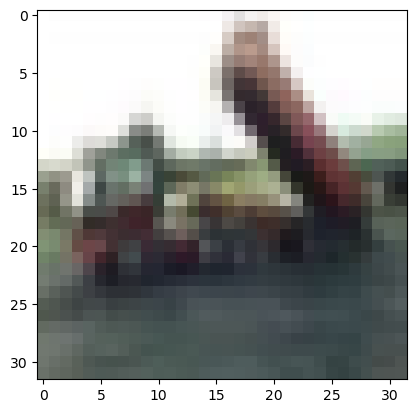

In [9]:
plt.imshow(X_train[2,])

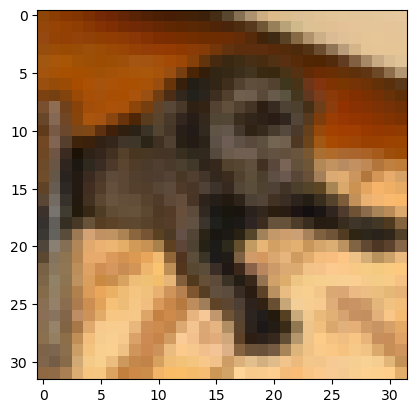

In [10]:
plt.imshow(X_train[56,])

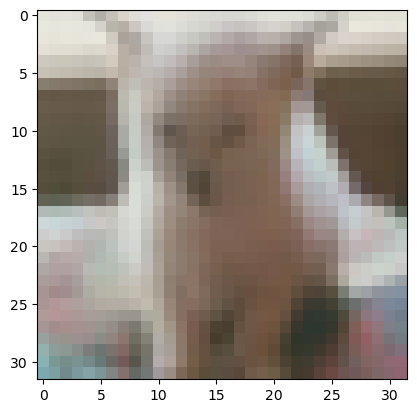

In [11]:
plt.imshow(X_train[922,])

## Data Normalisation

In [12]:
max_value = X_train.max()

In [13]:
max_value

255

In [14]:
X_train, X_test= X_train/max_value, X_test/max_value

In [15]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

plt.imshow(X_train[2,])

## Train/val/Test split 

### merging the train and test together again 

In [16]:
X_all_normalised= np.concatenate((X_train,X_test), axis= 0)
y_all_normalised= np.concatenate((y_train,y_test), axis=0) 

### Splitting 

In [17]:
test_ratio= 0.15
train_ratio= 0.85
val_ratio= 0.10

#### Train-val / Test split 

In [18]:
X_train_val, X_test, y_train_val, y_test= train_test_split(X_all_normalised, y_all_normalised, test_size= test_ratio, random_state= 42)

## Changing the integer encoded labels to one-hot

In [19]:
y_train[3:7]

array([[4],
       [1],
       [1],
       [2]], dtype=uint8)

In [20]:
y_test[23:28]

array([[5],
       [2],
       [1],
       [5],
       [5]], dtype=uint8)

In [21]:
y_train_val_one_hot= to_categorical(y_train_val) 
y_test_one_hot= to_categorical(y_test)

In [22]:
y_train_val_one_hot[3:7]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
y_test_one_hot[23:28]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

## Creating the MLP 

In [24]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape= [32,32,3]))
model.add(keras.layers.Dense(50, activation= "relu"))
model.add(keras.layers.Dense(50, activation= "relu"))
model.add(keras.layers.Dense(50, activation= "relu"))
model.add(keras.layers.Dense(50, activation= "relu"))
model.add(keras.layers.Dense(10, activation= "softmax"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 50)                153650    
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
Total params: 161,810
Trainable params: 161,810
Non-trai

In [26]:
model.layers

In [27]:
model.layers[1].get_weights()

[array([[-0.01356622, -0.03456558,  0.04240936, ...,  0.01140735,
         -0.02727719,  0.03515492],
        [ 0.03724816, -0.03305691, -0.04007837, ...,  0.00617778,
         -0.02557129, -0.04307098],
        [-0.02968056, -0.02109109,  0.02256069, ...,  0.0366772 ,
          0.03990258,  0.02582692],
        ...,
        [-0.01607661,  0.01625716,  0.0093126 , ..., -0.04058156,
         -0.01871639,  0.036685  ],
        [-0.01255953, -0.03658399,  0.01016707, ...,  0.02527467,
          0.00595434, -0.03162981],
        [-0.03716097,  0.01082304, -0.00032911, ..., -0.01234769,
         -0.02656094, -0.01346536]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)]

## Model Compile 

In [28]:
model.compile(loss= "categorical_crossentropy",
              optimizer= "sgd",
              metrics= ["accuracy"])

## Fitting Model

In [29]:
history= model.fit(X_train_val, y_train_val_one_hot, epochs= 50, validation_split= 0.15)

Epoch 1/50
 238/1355 [====>.........................] - ETA: 0s - loss: 2.2533 - accuracy: 0.1541

2024-07-04 19:47:47.740173: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1355/1355 [==============================] - 1s 517us/step - loss: 2.0335 - accuracy: 0.2523 - val_loss: 1.9351 - val_accuracy: 0.2805
Epoch 2/50
1355/1355 [==============================] - 1s 454us/step - loss: 1.8128 - accuracy: 0.3493 - val_loss: 1.7469 - val_accuracy: 0.3771
Epoch 3/50
1355/1355 [==============================] - 1s 453us/step - loss: 1.7224 - accuracy: 0.3842 - val_loss: 1.7034 - val_accuracy: 0.3868
Epoch 4/50
1355/1355 [==============================] - 1s 453us/step - loss: 1.6727 - accuracy: 0.4020 - val_loss: 1.7073 - val_accuracy: 0.3737
Epoch 5/50
1355/1355 [==============================] - 1s 455us/step - loss: 1.6314 - accuracy: 0.4154 - val_loss: 1.6555 - val_accuracy: 0.4056
Epoch 6/50
1355/1355 [==============================] - 1s 453us/step - loss: 1.5935 - accuracy: 0.4330 - val_loss: 1.6028 - val_accuracy: 0.4222
Epoch 7/50
1355/1355 [==============================] - 1s 459us/step - loss: 1.5698 - accuracy: 0.4391 - val_loss: 1.6495 - val_accura

In [30]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1355}

In [31]:
history.history

{'loss': [2.0334808826446533,
  1.8128036260604858,
  1.7223970890045166,
  1.6726795434951782,
  1.6313986778259277,
  1.5934569835662842,
  1.5698035955429077,
  1.544983983039856,
  1.525526762008667,
  1.5035754442214966,
  1.4911473989486694,
  1.4730628728866577,
  1.4580433368682861,
  1.4463554620742798,
  1.4319751262664795,
  1.4214906692504883,
  1.4095361232757568,
  1.396775245666504,
  1.3880475759506226,
  1.3762754201889038,
  1.368389368057251,
  1.3591111898422241,
  1.350879430770874,
  1.343591332435608,
  1.3348380327224731,
  1.3251210451126099,
  1.3190480470657349,
  1.311576008796692,
  1.304703950881958,
  1.2960985898971558,
  1.2904161214828491,
  1.2837533950805664,
  1.2742505073547363,
  1.2713332176208496,
  1.2647148370742798,
  1.25835382938385,
  1.2520452737808228,
  1.2458285093307495,
  1.2414294481277466,
  1.2341238260269165,
  1.2288224697113037,
  1.2223057746887207,
  1.2153633832931519,
  1.2130457162857056,
  1.2083169221878052,
  1.20196795

## Plotting 

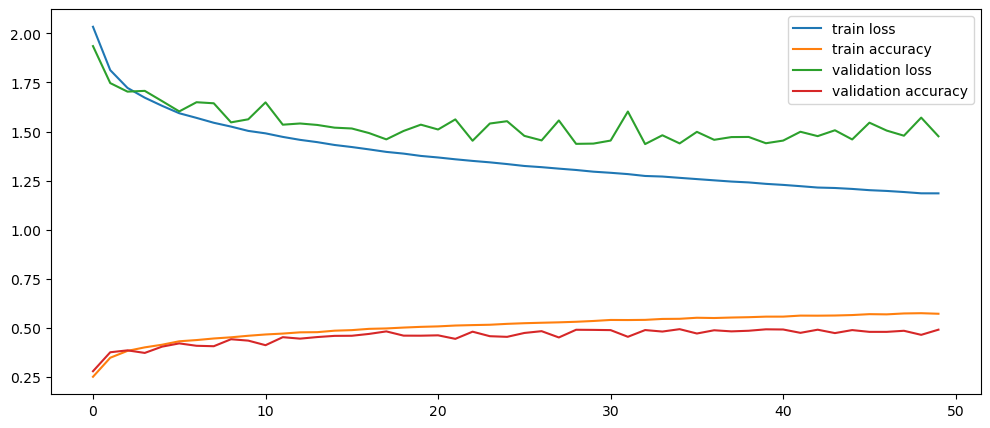

In [32]:
fig,ax= plt.subplots(figsize= (12,5))
ax.plot(history.history["loss"], label= "train loss")
ax.plot(history.history["accuracy"], label= "train accuracy")
ax.plot(history.history["val_loss"], label= "validation loss")
ax.plot(history.history["val_accuracy"], label= "validation accuracy")
ax.legend()

# Hyperparameter tuning using Keras_Tuner 

Write a function that creates and returns a Keras model. Use the hp argument to define the hyperparameters during model creation:

In [33]:
def build_model(hp):

    model= keras.Sequential()
    model.add(layers.Flatten(input_shape= [32,32,3]))

    # Tuning the number of hidden layers:
    num_layers= hp.Int('num_layers', min_value= 1, max_value= 5)

    # Tuning the num of units in each layer:
    for i in range(num_layers):
        units= hp.Int(f'units_{i}', min_value= 100, max_value= 200, step= 32)
        model.add(layers.Dense(units=units, activation= 'relu'))

    # Output layer:
    model.add(layers.Dense(10, activation= 'softmax'))

    # Tuning the learning rate for the optimizer:
    learning_rate= hp.Choice('learning_rate', values= [1e-2, 1e-3, 1e-4])

    # Compiling the model:
    model.compile(optimizer= keras.optimizers.Adam(learning_rate= learning_rate),
                  loss= 'categorical_crossentropy',
                  metrics= ['accuracy'])

    return model 

### Creating the tuner 

In [34]:
tuner= kt.RandomSearch(
    build_model,
    objective= 'val_accuracy',
    max_trials= 10,
    executions_per_trial=2,
    directory= 'my_dir',
    project_name= 'cifar10_tuning'
)

Reloading Tuner from my_dir/cifar10_tuning/tuner0.json


### Running the Tuner

In [39]:
tuner.search(X_train_val, y_train_val_one_hot, epochs= 10, validation_split= 0.15)

## Retrieve and evaluate the best model

In [40]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
best_hps

#### Build the model with the optimal hyperparameters

In [41]:
model= tuner.hypermodel.build(best_hps)

In [42]:
model

### Train the model

In [43]:
history= model.fit(X_train_val,y_train_val_one_hot, epochs= 50, validation_split= 0.15)

Epoch 1/50
1355/1355 [==============================] - 2s 1ms/step - loss: 1.8929 - accuracy: 0.3147 - val_loss: 1.7595 - val_accuracy: 0.3684
Epoch 2/50
1355/1355 [==============================] - 1s 1ms/step - loss: 1.6944 - accuracy: 0.3917 - val_loss: 1.6701 - val_accuracy: 0.3940
Epoch 3/50
1355/1355 [==============================] - 1s 1ms/step - loss: 1.6119 - accuracy: 0.4260 - val_loss: 1.6032 - val_accuracy: 0.4227
Epoch 4/50
1355/1355 [==============================] - 1s 1ms/step - loss: 1.5566 - accuracy: 0.4437 - val_loss: 1.5833 - val_accuracy: 0.4256
Epoch 5/50
1355/1355 [==============================] - 1s 1ms/step - loss: 1.5124 - accuracy: 0.4604 - val_loss: 1.5766 - val_accuracy: 0.4378
Epoch 6/50
1355/1355 [==============================] - 1s 1ms/step - loss: 1.4734 - accuracy: 0.4714 - val_loss: 1.5274 - val_accuracy: 0.4468
Epoch 7/50
1355/1355 [==============================] - 1s 1ms/step - loss: 1.4420 - accuracy: 0.4861 - val_loss: 1.5261 - val_accuracy:

### Evaluating the model on the test set 

In [44]:
test_loss, test_accuracy= model.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy: {test_accuracy}")

282/282 [==============================] - 0s 408us/step - loss: 1.5256 - accuracy: 0.5206
Test accuracy: 0.5205555558204651


## Retreiving the best values of hyperparameters: 

In [45]:
print("Best hyperparameters:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")

Best hyperparameters:
num_layers: 5
units_0: 132
learning_rate: 0.0001
units_1: 164
units_2: 100
units_3: 164
units_4: 132


# Visualisation

In [46]:
# Accessing the history: 
history_dict= history.history

In [47]:
history_dict

{'loss': [1.8929020166397095,
  1.6943645477294922,
  1.611948013305664,
  1.5565897226333618,
  1.5124491453170776,
  1.4733550548553467,
  1.4420336484909058,
  1.4132000207901,
  1.3867874145507812,
  1.362969994544983,
  1.3448842763900757,
  1.3215303421020508,
  1.3035968542099,
  1.285719871520996,
  1.2637336254119873,
  1.2495466470718384,
  1.2327497005462646,
  1.2141425609588623,
  1.2010730504989624,
  1.1848320960998535,
  1.1702327728271484,
  1.1543585062026978,
  1.1400201320648193,
  1.124419927597046,
  1.1108633279800415,
  1.0976746082305908,
  1.0844818353652954,
  1.0701885223388672,
  1.052355408668518,
  1.0445616245269775,
  1.0287009477615356,
  1.0182329416275024,
  1.0058653354644775,
  0.9912795424461365,
  0.9800565838813782,
  0.9668623208999634,
  0.955984890460968,
  0.9449229836463928,
  0.933223307132721,
  0.9191119074821472,
  0.9096246957778931,
  0.8962947130203247,
  0.8846955299377441,
  0.8731403350830078,
  0.8607121109962463,
  0.85348099470

### Extract accuracy and loss values

In [48]:
train_accuracies = history_dict['accuracy']
val_accuracies   = history_dict['val_accuracy']
train_losses     = history_dict['loss']
val_losses       = history_dict['val_loss']

#### Plotting accuracy values 

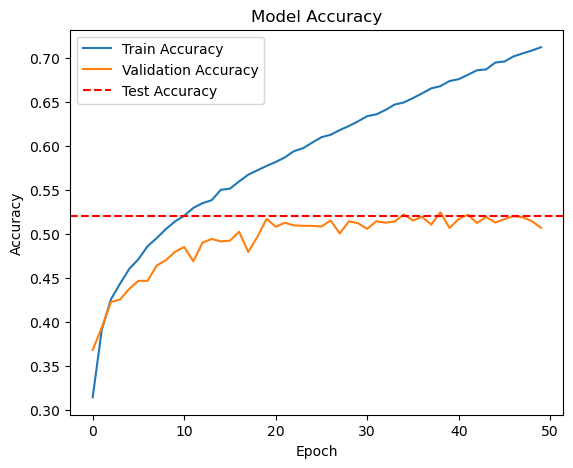

In [49]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(train_accuracies, label= "Train Accuracy")
plt.plot(val_accuracies, label= "Validation Accuracy")
plt.axhline(y=test_accuracy, color='r', linestyle= "--", label= "Test Accuracy")
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc= 'upper left')

## Some other performance metrics 

### ROC AUC (Receiver Operating Characteristic Area Under the Curve)

The ROC AUC is a performance measurement for classification problems at various threshold settings. The ROC curve is a plot of true positive rate (TPR) against false positive rate (FPR) at different classification thresholds. The AUC (Area Under the Curve) measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

- **True Positive Rate (TPR) or Recall:** TPR = TP / (TP + FN)
- **False Positive Rate (FPR):** FPR = FP / (FP + TN)

The AUC value ranges from 0 to 1:
- **AUC = 1:** Perfect model
- **AUC = 0.5:** Model performs no better than random guessing
- **AUC < 0.5:** Model performs worse than random guessing

### F1 Score

The F1 Score is the harmonic mean of precision and recall. It is a measure of a test's accuracy and is useful when you need to balance both precision and recall. The F1 score reaches its best value at 1 and worst score at 0.

- **Precision:** Precision = TP / (TP + FP)
- **Recall:** Recall = TP / (TP + FN)

\[ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \]

### When to Use Each Metric

- **ROC AUC:** Useful when you want to measure the performance of a classification model at different threshold levels. It's especially helpful when you have imbalanced classes and want to see how well your model distinguishes between the positive and negative classes.
- **F1 Score:** Useful when you want a single metric that balances precision and recall. It's particularly helpful in cases where you need to account for both false positives and false negatives.

# Making predictions 

In [50]:
Test_set_prediction= model.predict(X_test)

282/282 [==============================] - 0s 382us/step


In [54]:
# Assuming Test_set_prediction contains the predicted probabilities for the positive class
# Convert predictions to class labels for F1 score
y_pred_classes = np.argmax(Test_set_prediction, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

In [56]:
print(Test_set_prediction[2])

[2.26529669e-02 6.09354038e-06 1.13861263e-01 1.92924589e-02
 7.14659214e-01 1.63689181e-02 1.12788275e-01 1.41539495e-04
 2.22643794e-04 6.59437728e-06]


In [57]:
print(y_pred_classes[2])

4


In [58]:
print(y_true_classes[2])

2


In [59]:
print(y_test_one_hot[2])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Using ROC AUC and f1-score metrics 

In [60]:
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test_one_hot, Test_set_prediction, multi_class='ovr')

# Calculate F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'ROC AUC: {roc_auc}')
print(f'F1 Score: {f1}')

ROC AUC: 0.8891964943132947
F1 Score: 0.5186475183465886


In [61]:
print(len(y_test_one_hot))
print(len(Test_set_prediction))

9000
9000


# Discussion

Based on the results, it looks like your model might be overfitting to the training data, as indicated by the significant drop in accuracy from the training set (0.70) to the validation (0.52) and test sets (0.51). Here are a few strategies to help improve your model's performance and reduce overfitting:

### 1. **Regularization Techniques**
- **Dropout:** Introduce dropout layers to reduce overfitting. This randomly drops neurons during training, which helps prevent the model from becoming too reliant on specific neurons.
- **L2 Regularization:** Add L2 regularization to your layers to penalize large weights and encourage the model to keep weights small, which can reduce overfitting.

### 2. **Simplify the Model**
Sometimes, reducing the complexity of your model can help improve generalization.
- Reduce the number of layers or units per layer. Start with a simpler model and gradually increase complexity only if necessary.

### 3. **Data Augmentation**
If you're working with image data or other types of data where augmentation is applicable, use data augmentation techniques to artificially increase the size and diversity of your training set.

### 4. **Early Stopping**
Implement early stopping during training to halt training when the validation loss starts to increase, which indicates that the model is beginning to overfit.

### 5. **Increase Training Data**
If possible, increase the size of your training dataset. More data can help the model generalize better.

### 6. **Tune Hyperparameters Further**
- **Learning Rate:** Sometimes, a smaller learning rate can help the model converge more smoothly.
- **Batch Size:** Experiment with different batch sizes. Smaller batches can lead to more noise in the gradient estimates, which might help escape local minima and find better generalization.

# Using Genetic Selection algorithm 

In [1]:
selector = GeneticSelectionCV(estimator=model,
                              cv=3, # Number of cross-validation folds
                              verbose=1, # Verbosity mode
                              scoring="accuracy", # Scoring metric
                              max_features=50, # Maximum number of features to select
                              n_population=30, # Population size for the genetic algorithm
                              crossover_proba=0.8, # Crossover probability
                              mutation_proba=0.1, # Mutation probability
                              n_generations=20, # Number of generations
                              crossover_independent_proba=0.5, # Probability of crossover for each gene
                              mutation_independent_proba=0.02, # Probability of mutation for each gene
                              tournament_size=3, # Tournament size
                              n_gen_no_change=5, # Number of generations with no improvement
                              caching=True, # Whether to cache the evaluated features
                              n_jobs=-1) # Number of parallel jobs

NameError: name 'GeneticSelectionCV' is not defined